# 제품 이상여부 판별 프로젝트


## 1. 데이터 불러오기


### 필수 라이브러리


In [59]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

### 데이터 읽어오기


In [60]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
train_data

Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
1          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
2          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
3          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
4          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
...            ...               ...               ...              ...   
40501      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40502      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40503      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40504      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40505      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   

      Workorder_Dam  Insp. Seq No._Dam Insp Judge Code_Dam  \
0        4F1XA938-1                  1                  OK   
1        3KPM0016-2                  1                  OK   
2        4E1X9167-1                  1                  OK   
3        3K1X0057-1                  1                  OK   
4        3HPM0007-1                  1                  OK   
...             ...                ...                 ...   
40501    3J1XF434-2                  1                  OK   
40502    4E1XC796-1                  1                  OK   
40503    4C1XD438-1                  1                  OK   
40504    3I1XA258-1                  1                  OK   
40505    3G1XA501-1                  1                  OK   

       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                       240.0   
2                                      1000.0   
3                                      1000.0   
4                                       240.0   
...                                       ...   
40501                                   240.0   
40502                                  1000.0   
40503                                   240.0   
40504                                  1000.0   
40505                                   240.0   

       CURE END POSITION X Unit Time_Dam  CURE END POSITION X Judge Value_Dam  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
40501                                NaN                                  NaN   
40502                                NaN                                  NaN   
40503                                NaN                                  NaN   
40504                                NaN                                  NaN   
40505                                NaN                                  NaN   

       ...  Production Qty Collect Result_Fill2  \
0      ...                                    7   
1      ...                                  185   
2      ...                                   10   
3      ...                                  268   
4      ...                                  121   
...    ...                                  ...   
40501  ...                                  318   
40502  ...                                   14   
40503  ...                                    1   
40504  ...                                  117   
40505  ...                                  320   

       Production Qty Unit Time_Fill2  Production Qty Judge Value_Fill2  \
0                                 NaN                               NaN   
1                                 N

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 464 entries, Wip Line_Dam to target
dtypes: float64(350), int64(77), object(37)
memory usage: 143.4+ MB


In [61]:
train_data["target"].value_counts()

target
Normal      38156
AbNormal     2350
Name: count, dtype: int64

In [62]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))
test_data

Set ID Wip Line_Dam Process Desc._Dam  \
0      0001be084fbc4aaa9d921f39e595961b      IVI-OB6     Dam Dispenser   
1      0005bbd180064abd99e63f9ed3e1ac80      IVI-OB6     Dam Dispenser   
2      000948934c4140d883d670adcb609584      IVI-OB6     Dam Dispenser   
3      000a6bfd02874c6296dc7b2e9c5678a7      IVI-OB6     Dam Dispenser   
4      0018e78ce91343678716e2ea27a51c95      IVI-OB6     Dam Dispenser   
...                                 ...          ...               ...   
17356  ffea508b59934d689b540f95eb3fa730      IVI-OB6     Dam Dispenser   
17357  ffed8923c8a448a98afc641b770be153      IVI-OB6     Dam Dispenser   
17358  fff1e73734da40adbe805359b3efb462      IVI-OB6     Dam Dispenser   
17359  fff8e38bdd09470baf95f71e92075dec      IVI-OB6     Dam Dispenser   
17360  fffa83e0a13d4c2db4fd8bf905b517d4      IVI-OB6     Dam Dispenser   

          Equipment_Dam Model.Suffix_Dam Workorder_Dam  Insp. Seq No._Dam  \
0      Dam dispenser #2      AJX75334501    3J1XF767-1                  1   
1      Dam dispenser #2      AJX75334501    4B1XD472-2                  1   
2      Dam dispenser #1      AJX75334501    3H1XE355-1                  1   
3      Dam dispenser #2      AJX75334501    3L1XA128-1                  1   
4      Dam dispenser #1      AJX75334501    4A1XA639-1                  1   
...                 ...              ...           ...                ...   
17356  Dam dispenser #2      AJX75334501    3K1XB597-1                  1   
17357  Dam dispenser #2      AJX75334501    4A1XB974-1                  1   
17358  Dam dispenser #1      AJX75334501    3L1XA998-1                  1   
17359  Dam dispenser #1      AJX75334501    3F1XC376-1                  1   
17360  Dam dispenser #1      AJX75334501    3J1XC756-1                  1   

      Insp Judge Code_Dam  CURE END POSITION X Collect Result_Dam  \
0                      OK                                  1000.0   
1                      OK                                  1000.0   
2                      OK                                   240.0   
3                      OK                                  1000.0   
4                      OK                                   240.0   
...                   ...                                     ...   
17356                  OK                                  1000.0   
17357                  OK                                  1000.0   
17358                  OK                                   240.0   
17359                  OK                                   240.0   
17360                  OK                                   240.0   

       CURE END POSITION X Unit Time_Dam  ...  \
0                                    NaN  ...   
1                                    NaN  ...   
2                                    NaN  ...   
3                                    NaN  ...   
4                                    NaN  ...   
...                                  ...  ...   
17356                                NaN  ...   
17357                                NaN  ...   
17358                                NaN  ...   
17359                                NaN  ...   
17360                                NaN  ...   

       Production Qty Collect Result_Fill2  Production Qty Unit Time_Fill2  \
0                                      195                             NaN   
1                                       14                             NaN   
2                                       98                             NaN   
3                                       14                             NaN   
4                                        1                             NaN   
...                                    ...                             ...   
17356                                   14                             NaN   
17357                                   12                             NaN   
17358                                    4                             NaN   
17359                

In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Columns: 465 entries, Set ID to target
dtypes: float64(351), int64(77), object(37)
memory usage: 61.6+ MB


In [19]:
# 'tt' 칼럼 추가
train_data['tt'] = 'train'
test_data['tt'] = 'test'

In [63]:
train_target = train_data['target']

testSet = test_data['Set ID']
test_target = test_data['target']

In [64]:
train_data = train_data.drop(columns = ['target'])

test_data = test_data.drop(columns=['Set ID', 'target'])

In [65]:
df = pd.concat([train_data, test_data], ignore_index=True)

In [66]:
df.describe()

Insp. Seq No._Dam  CURE END POSITION X Collect Result_Dam  \
count            57867.0                            57867.000000   
mean                 1.0                              530.291185   
std                  0.0                              369.262352   
min                  1.0                              240.000000   
25%                  1.0                              240.000000   
50%                  1.0                              240.000000   
75%                  1.0                             1000.000000   
max                  1.0                             1000.000000   

       CURE END POSITION X Unit Time_Dam  CURE END POSITION X Judge Value_Dam  \
count                                0.0                                  0.0   
mean                                 NaN                                  NaN   
std                                  NaN                                  NaN   
min                                  NaN                                  NaN   
25%                                  NaN                                  NaN   
50%                                  NaN                                  NaN   
75%                                  NaN                                  NaN   
max                                  NaN                                  NaN   

       CURE END POSITION Z Collect Result_Dam  \
count                            57867.000000   
mean                                 6.319621   
std                                  4.858715   
min                                  2.500000   
25%                                  2.500000   
50%                                  2.500000   
75%                                 12.500000   
max                                 12.500000   

       CURE END POSITION Z Unit Time_Dam  CURE END POSITION Z Judge Value_Dam  \
count                                0.0                                  0.0   
mean                                 NaN                                  NaN   
std                                  NaN                                  NaN   
min                                  NaN                                  NaN   
25%                                  NaN                                  NaN   
50%                                  NaN                                  NaN   
75%                                  NaN                                  NaN   
max                                  NaN                                  NaN   

       CURE END POSITION Θ Collect Result_Dam  \
count                            57867.000000   
mean                               -21.246825   
std                                 87.456873   
min                                -90.000000   
25%                                -90.000000   
50%                                -90.000000   
75%                                 90.000000   
max                                 90.000000   

       CURE END POSITION Θ Unit Time_Dam  CURE END POSITION Θ Judge Value_Dam  \
count                                0.0                                  0.0   
mean                                 NaN                                  NaN   
std                                  NaN                                  NaN   
min                                  NaN                                  NaN   
25%                                  NaN                                  NaN   
50%                                  NaN                                  NaN   
75%                                  NaN                                  NaN   
max                                  NaN                                  NaN   

       ...  PalletID Judge Value_Fill2  Production Qty Collect Result_Fill2  \
count  ...                         0.0                         57867.000000   
mean   ...                         NaN                            73.378644   
std    ...                         NaN                           105.008129   
min 

In [7]:
df.isnull().sum()

Wip Line_Dam                         0
Process Desc._Dam                    0
Equipment_Dam                        0
Model.Suffix_Dam                     0
Workorder_Dam                        0
                                 ...  
Receip No Unit Time_Fill2        57867
Receip No Judge Value_Fill2      57867
WorkMode Collect Result_Fill2        0
WorkMode Unit Time_Fill2         57867
WorkMode Judge Value_Fill2       57867
Length: 463, dtype: int64

In [67]:
# 각 열별 결측치 개수 확인
missing_values_count = (df.isnull().sum())
missing_values_count = missing_values_count/df.shape[0] 
missing_values_ratio = missing_values_count * 100
print(missing_values_ratio)

Wip Line_Dam                       0.0
Process Desc._Dam                  0.0
Equipment_Dam                      0.0
Model.Suffix_Dam                   0.0
Workorder_Dam                      0.0
                                 ...  
Receip No Unit Time_Fill2        100.0
Receip No Judge Value_Fill2      100.0
WorkMode Collect Result_Fill2      0.0
WorkMode Unit Time_Fill2         100.0
WorkMode Judge Value_Fill2       100.0
Length: 463, dtype: float64


In [68]:
bins = [0, 20, 40, 60, 70, 80, 90,100]
missing_values_counts = pd.cut(missing_values_ratio, bins=bins).value_counts().sort_index()

print(missing_values_counts)

(0, 20]        0
(20, 40]       3
(40, 60]       0
(60, 70]       0
(70, 80]       5
(80, 90]       0
(90, 100]    278
Name: count, dtype: int64


In [69]:
# 결측치 비율이 90 이상인 열 삭제
threshold = 90
df= df.drop(columns=missing_values_ratio[missing_values_ratio >= threshold].index)

--

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57867 entries, 0 to 57866
Columns: 185 entries, Wip Line_Dam to WorkMode Collect Result_Fill2
dtypes: float64(72), int64(77), object(36)
memory usage: 81.7+ MB


In [72]:
df.shape

(57867, 185)

In [73]:
# "Workorder"를 포함하는 열의 인덱스 찾기
process_columns = [col for col in df.columns if "Workorder" in col]
process_columns

['Workorder_Dam', 'Workorder_AutoClave', 'Workorder_Fill1', 'Workorder_Fill2']

In [74]:
# 피처 분리 함수 정의
# 피처 분리 함수 정의
def split_workorder_column(df, column_name):
    category_col = f'{column_name}_category'
    number_col = f'{column_name}_number'
    split_cols = df[column_name].str.split('-', expand=True)
    split_cols.columns = [category_col, number_col]
    split_cols[number_col] = split_cols[number_col].astype(int)  # 숫자 컬럼을 int 형식으로 변환
    return split_cols

# 모든 분리된 피처를 저장할 리스트
split_columns = []

# 각 피처에 대해 분리 작업 수행
process_columns = ['Workorder_Dam', 'Workorder_AutoClave', 'Workorder_Fill1', 'Workorder_Fill2']
for column in process_columns:
    split_columns.append(split_workorder_column(df, column))

# 분리된 모든 피처를 데이터프레임에 결합
df_split = pd.concat([df] + split_columns, axis=1)

print(df_split)

      Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
1          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
2          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
3          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
4          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
...            ...               ...               ...              ...   
57862      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
57863      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
57864      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
57865      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
57866      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   

      Workorder_Dam  Insp. Seq No._Dam Insp Judge Code_Dam  \
0        4F1XA938-1                  

In [76]:
df_split.shape

(57867, 193)

In [77]:
# 1. 상수 열 식별
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

# 2. 상수 열 개수와 이름 확인
print(f"Number of constant columns: {len(constant_columns)}")
print(f"Constant columns: {constant_columns}")

Number of constant columns: 40
Constant columns: ['Wip Line_Dam', 'Process Desc._Dam', 'Insp. Seq No._Dam', 'Insp Judge Code_Dam', 'CURE STANDBY POSITION X Collect Result_Dam', 'CURE STANDBY POSITION Z Collect Result_Dam', 'CURE STANDBY POSITION Θ Collect Result_Dam', 'CURE START POSITION Z Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam', 'Wip Line_AutoClave', 'Process Desc._AutoClave', 'Equipment_AutoClave', 'Insp. Seq No._AutoClave', 'Insp Judge Code_AutoClave', '1st Pressure Judge Value_AutoClave', '2nd Pressure Judge Value_AutoClave', '3rd Pressure Judge Value_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave', 'Wip Line_Fill1', 'Process Desc._Fill1', 'Insp. Seq No._Fill1', 'Insp Judge Code_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1', 'Wip Line_Fill2', 'Process Desc._Fill2', 'Insp. Seq No._Fill2', 'Insp Judge Code_Fill2', 'CURE END POSITION Θ Collect Result_Fill2'

In [31]:
print(df['Wip Line_Dam'])

0        IVI-OB6
1        IVI-OB6
2        IVI-OB6
3        IVI-OB6
4        IVI-OB6
          ...   
57862    IVI-OB6
57863    IVI-OB6
57864    IVI-OB6
57865    IVI-OB6
57866    IVI-OB6
Name: Wip Line_Dam, Length: 57867, dtype: object


In [78]:
# 3. 상수 열 삭제
df.drop(columns=constant_columns, inplace=True)

# 4. 삭제된 열의 이름 반환
print(f"Deleted columns: {constant_columns}")

Deleted columns: ['Wip Line_Dam', 'Process Desc._Dam', 'Insp. Seq No._Dam', 'Insp Judge Code_Dam', 'CURE STANDBY POSITION X Collect Result_Dam', 'CURE STANDBY POSITION Z Collect Result_Dam', 'CURE STANDBY POSITION Θ Collect Result_Dam', 'CURE START POSITION Z Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam', 'Wip Line_AutoClave', 'Process Desc._AutoClave', 'Equipment_AutoClave', 'Insp. Seq No._AutoClave', 'Insp Judge Code_AutoClave', '1st Pressure Judge Value_AutoClave', '2nd Pressure Judge Value_AutoClave', '3rd Pressure Judge Value_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave', 'Wip Line_Fill1', 'Process Desc._Fill1', 'Insp. Seq No._Fill1', 'Insp Judge Code_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1', 'Wip Line_Fill2', 'Process Desc._Fill2', 'Insp. Seq No._Fill2', 'Insp Judge Code_Fill2', 'CURE END POSITION Θ Collect Result_Fill2', 'CURE STANDBY POSITION X Colle

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57867 entries, 0 to 57866
Columns: 423 entries, Equipment_Dam to WorkMode Judge Value_Fill2
dtypes: float64(346), int64(62), object(15)
memory usage: 186.8+ MB


In [79]:
df.shape

(57867, 145)

In [80]:
# 중복된 열을 식별하고 제거
df_dup = df_split.loc[:, ~df_split.T.duplicated(keep='first')]

df_dup.shape

(57867, 139)

In [81]:
# 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=[float, int])

# 상관관계 계산
correlation_matrix = numeric_df.corr()

# 상관관계 행렬 출력
print(correlation_matrix)

                                          CURE END POSITION X Collect Result_Dam  \
CURE END POSITION X Collect Result_Dam                                  1.000000   
CURE END POSITION Z Collect Result_Dam                                  1.000000   
CURE END POSITION Θ Collect Result_Dam                                  1.000000   
CURE SPEED Collect Result_Dam                                           0.075891   
CURE START POSITION X Collect Result_Dam                               -1.000000   
...                                                                          ...   
Machine Tact time Collect Result_Fill2                                  0.267969   
PalletID Collect Result_Fill2                                           0.415403   
Production Qty Collect Result_Fill2                                    -0.166167   
Receip No Collect Result_Fill2                                          0.188893   
WorkMode Collect Result_Fill2                                           0.15

In [26]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


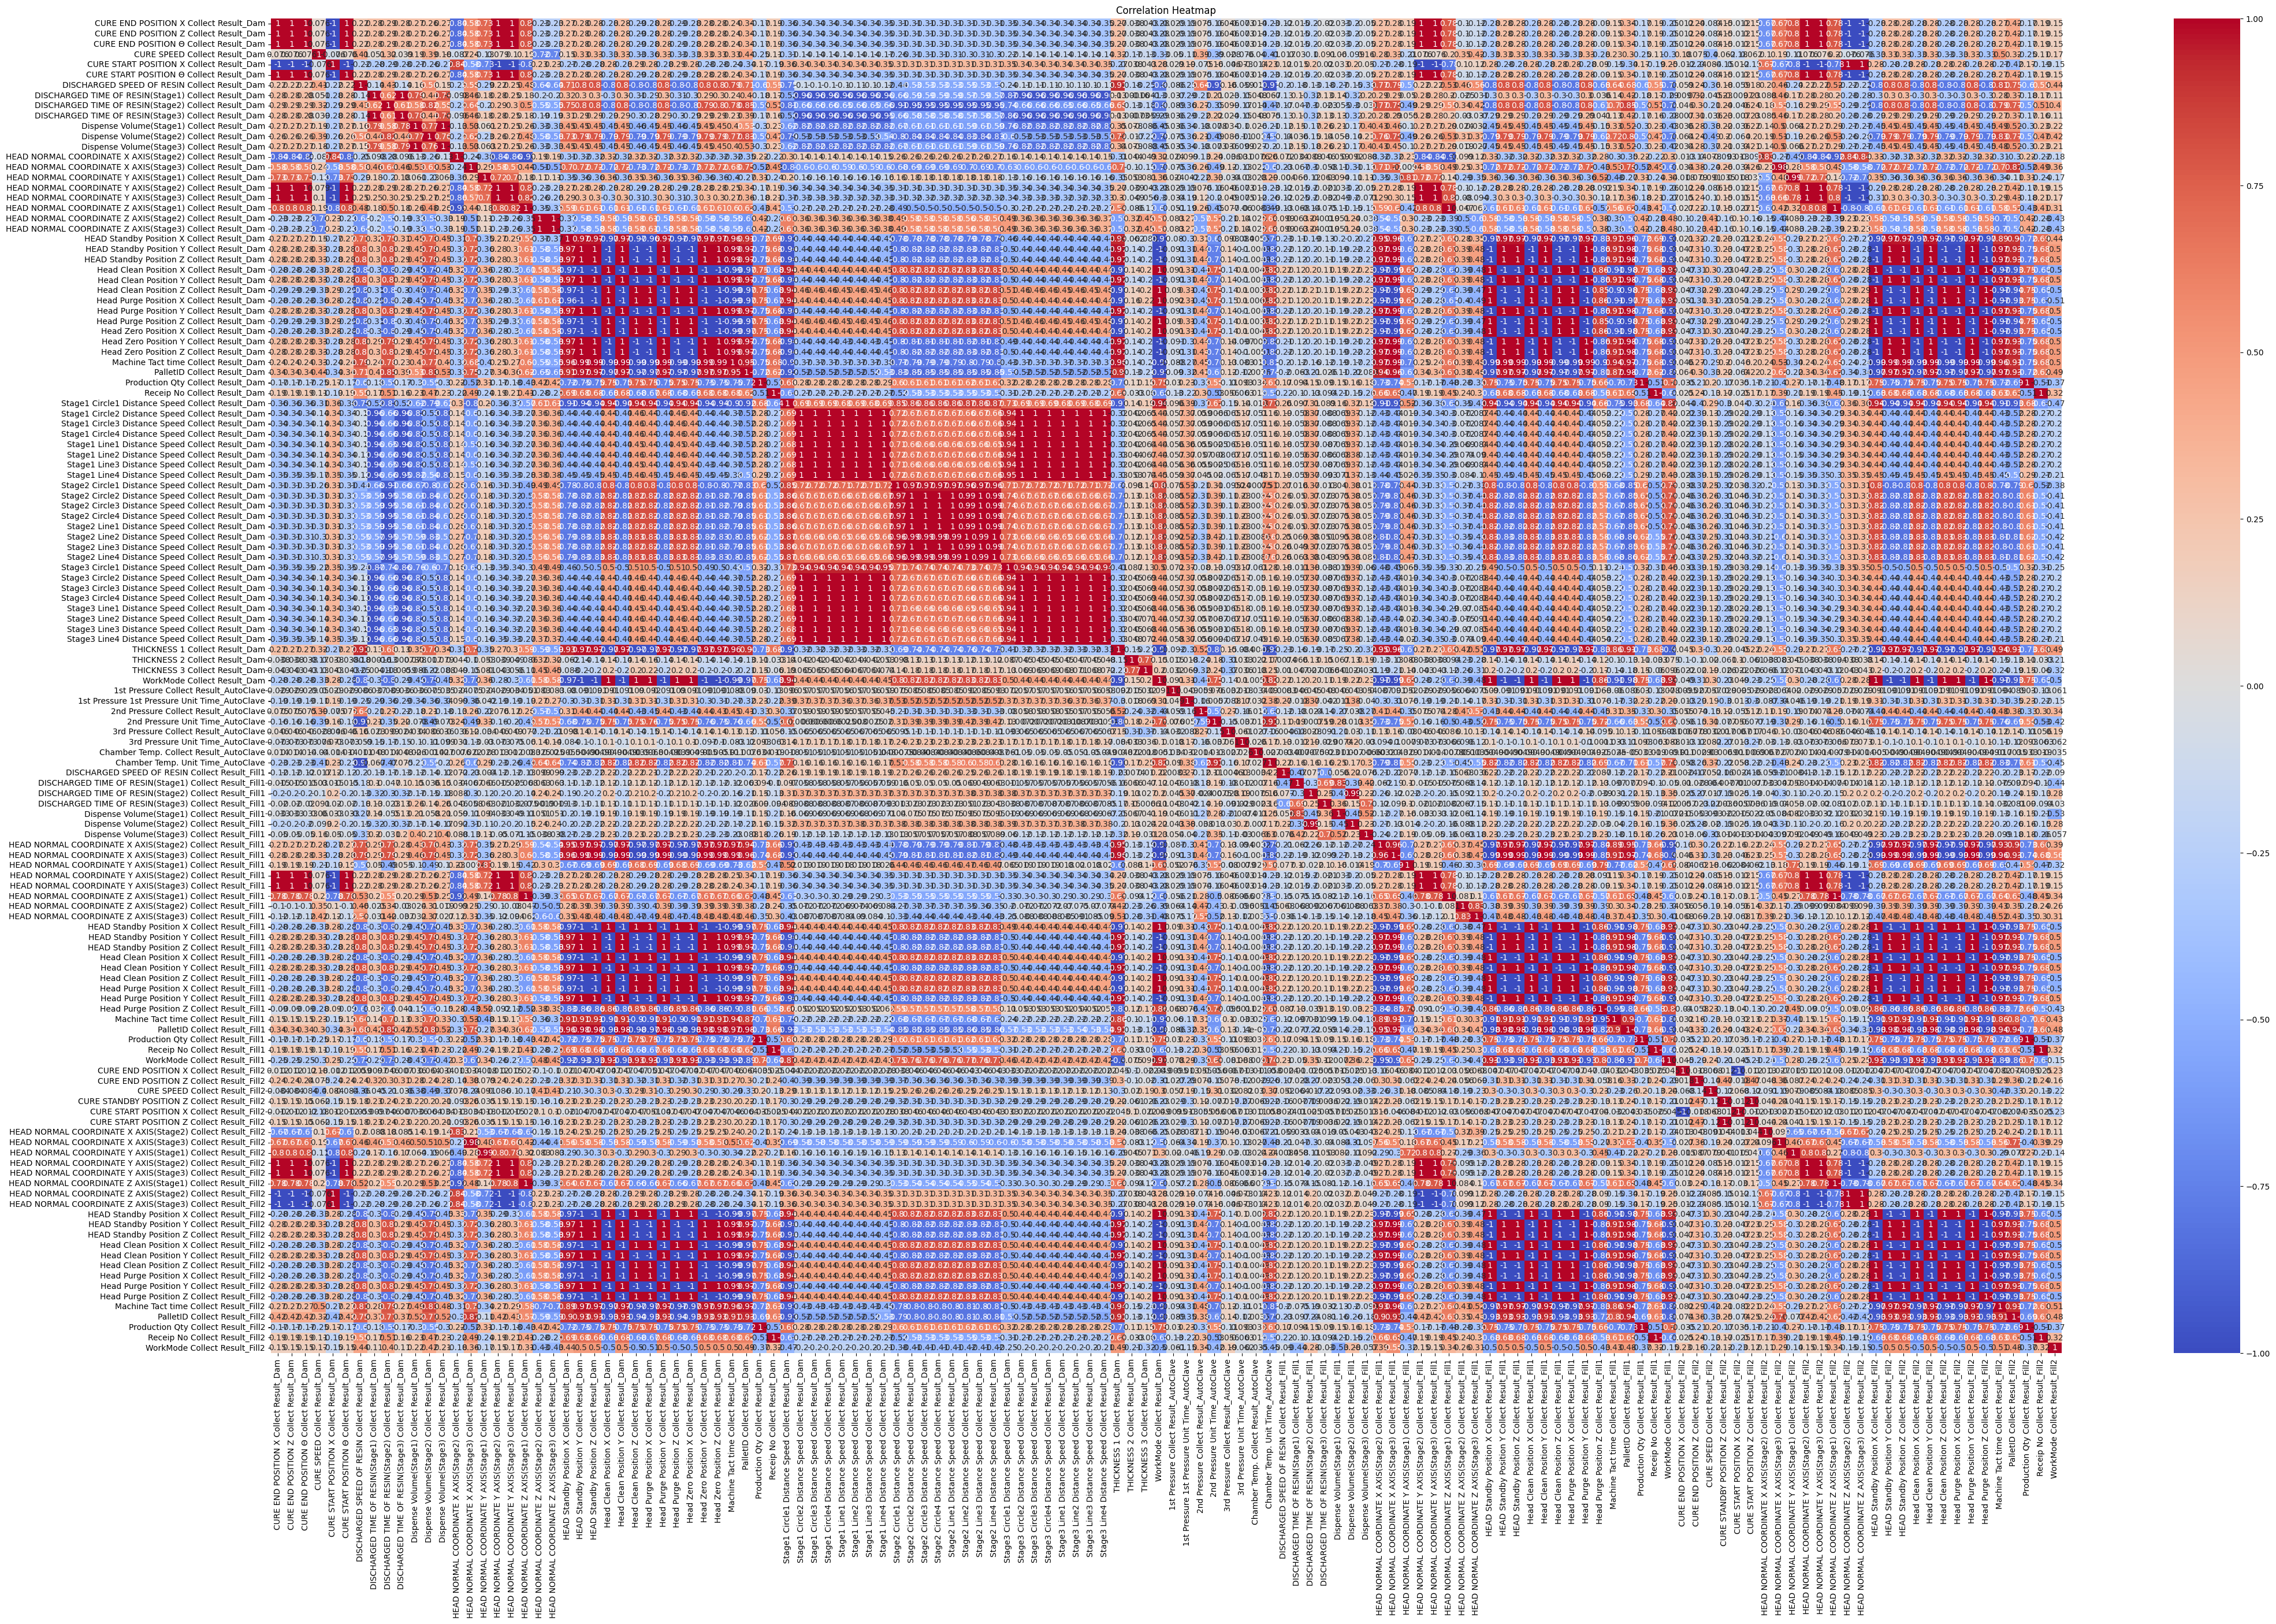

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [83]:
# 상관관계 행렬의 절대값
corr_matrix = numeric_df.corr().abs()
# 상관관계가 1에 가까운 변수 식별
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 상관관계가 높은 변수 제거
to_drop = [column for column in upper.columns if any(upper[column] >= 1)]
numeric_df_drop = numeric_df.drop(columns=to_drop)

print("제거된 변수:", to_drop)
print(numeric_df_drop)

제거된 변수: ['CURE END POSITION Z Collect Result_Dam', 'CURE START POSITION X Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam', 'Head Purge Position Y Collect Result_Dam', 'Head Zero Position X Collect Result_Dam', 'Stage1 Circle3 Distance Speed Collect Result_Dam', 'Stage1 Circle4 Distance Speed Collect Result_Dam', 'Stage1 Line3 Distance Speed Collect Result_Dam', 'Stage2 Circle3 Distance Speed Collect Result_Dam', 'Stage2 Circle4 Distance Speed Collect Result_Dam', 'Stage2 Line1 Distance Speed Collect Result_Dam', 'Stage3 Circle3 Distance Speed Collect Result_Dam', 'Stage3 Circle4 Distance Speed Collect Result_Dam', 'Stage3 Line3 Distance Speed Collect Result_Dam', 'HEAD Standby Position Y Collect Result_Fill1', 'Head Clean Position X Collect Result_Fill1', 'Head Clean Position Y Collect Result_Fill1', 'Head Clean Position Z Collect Result_Fill1', 'Head Purge Position X Collect Result_Fill1', 'Head Purge Position

In [84]:
numeric_df_drop.shape

(57867, 99)

In [24]:
# 상관계수가 0.9 이상인 피처 식별
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features  = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

print(f"Number of features with correlation higher than 0.9: {len(high_corr_features)}")
print(f"Features with high correlation: {high_corr_features}")

Number of features with correlation higher than 0.9: 85
Features with high correlation: ['CURE END POSITION Z Collect Result_Dam', 'CURE END POSITION Θ Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam', 'Dispense Volume(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam', 'HEAD Standby Position Y Collect Result_Dam', 'HEAD Standby Position Z Collect Result_Dam', 'Head Clean Position Y Collect Result_Dam', 'Head Clean Position Z Collect Result_Dam', 'Head Purge Position X Collect Result_Dam', 'Head Purge Position Y Collect Result_Dam', 'Head Purge Position Z Collect Result_Dam', 'Head Zero Position X Collect Result_Dam', 'Head Zero Position Y Collect Result_Dam', 'Head Zero Position Z Collect Result_Dam', 'Machine Tact time Collect Result_Dam', 'PalletID Collect Res

In [25]:
# 상관계수가 높은 피처 삭제
df_reduced = df.drop(columns=high_corr_features)

print(f"Deleted columns due to high correlation: {high_corr_features}")
print(df_reduced.head())

Deleted columns due to high correlation: ['CURE END POSITION Z Collect Result_Dam', 'CURE END POSITION Θ Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam', 'Dispense Volume(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam', 'HEAD Standby Position Y Collect Result_Dam', 'HEAD Standby Position Z Collect Result_Dam', 'Head Clean Position Y Collect Result_Dam', 'Head Clean Position Z Collect Result_Dam', 'Head Purge Position X Collect Result_Dam', 'Head Purge Position Y Collect Result_Dam', 'Head Purge Position Z Collect Result_Dam', 'Head Zero Position X Collect Result_Dam', 'Head Zero Position Y Collect Result_Dam', 'Head Zero Position Z Collect Result_Dam', 'Machine Tact time Collect Result_Dam', 'PalletID Collect Result_Dam', 'Stage1 Circle1 Distance Speed Collec

In [22]:
# 삭제할 컬럼의 리스트 확인
print(f"Columns to be deleted: {high_corr_features}")

# 삭제할 컬럼의 개수 확인
print(f"Number of columns to delete: {len(high_corr_features)}")

# df_reduced의 컬럼 개수 확인
print(f"Number of columns in df_reduced after deletion: {df_reduced.shape[1]}")

# 삭제 후 컬럼 목록 확인
print(f"Columns remaining in df_reduced: {df_reduced.columns.tolist()}")


Columns to be deleted: ['CURE END POSITION Z Collect Result_Dam', 'CURE END POSITION Θ Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam', 'Dispense Volume(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam', 'HEAD Standby Position Y Collect Result_Dam', 'HEAD Standby Position Z Collect Result_Dam', 'Head Clean Position Y Collect Result_Dam', 'Head Clean Position Z Collect Result_Dam', 'Head Purge Position X Collect Result_Dam', 'Head Purge Position Y Collect Result_Dam', 'Head Purge Position Z Collect Result_Dam', 'Head Zero Position X Collect Result_Dam', 'Head Zero Position Y Collect Result_Dam', 'Head Zero Position Z Collect Result_Dam', 'Machine Tact time Collect Result_Dam', 'PalletID Collect Result_Dam', 'Stage1 Circle1 Distance Speed Collect Result_Dam', 'St

In [26]:
df_reduced.shape

(57867, 338)

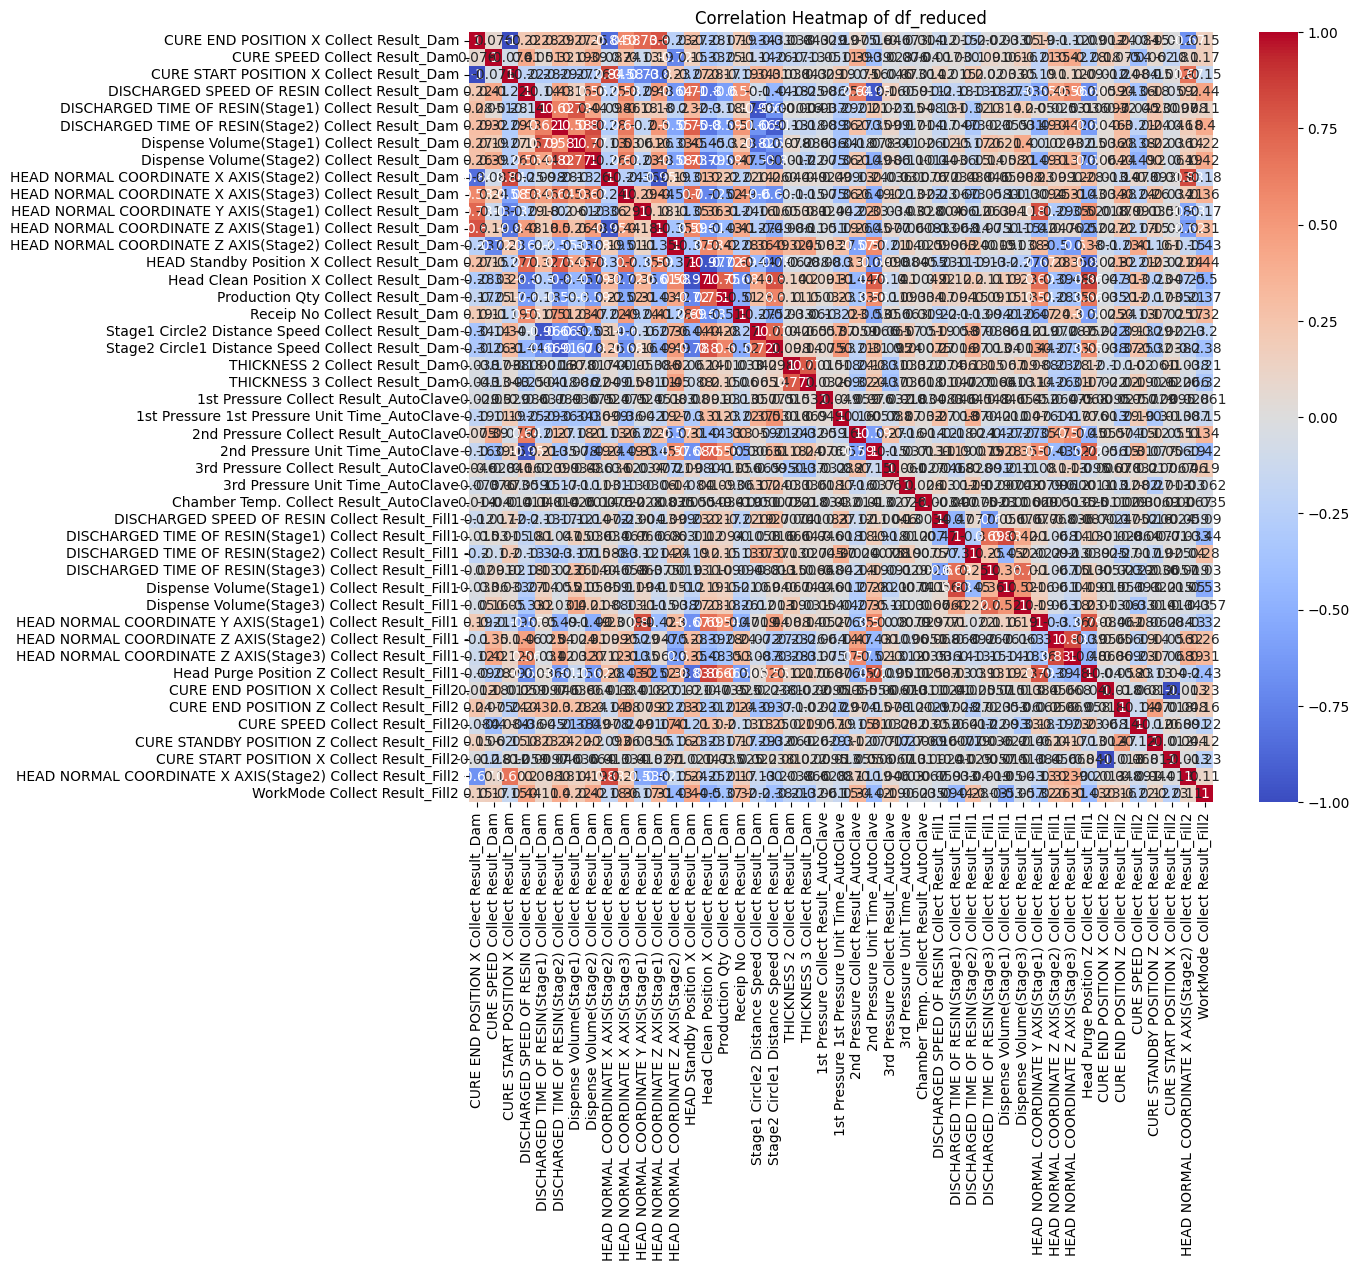

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df_reduced에서 숫자형 데이터만 선택하여 상관계수 행렬 계산
correlation_matrix_reduced = df_reduced.select_dtypes(include=['float', 'int']).corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))  # 히트맵 크기 설정
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of df_reduced')
plt.show()


In [27]:
#스케일링 진행
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
numeric_df_scaled = scaler.fit_transform(numeric_df)

/home/elicer/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/elicer/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/elicer/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [85]:
# 범주형 데이터 열 확인
categorical_df = df_dup.select_dtypes(include=['object', 'category'])
categorical_columns = df_dup.select_dtypes(include=['object', 'category']).columns

# 범주형 데이터 열 개수 출력
num_categorical_columns = len(categorical_columns)
print(f"Number of categorical columns: {num_categorical_columns}")
print(f"Categorical columns: {categorical_columns.tolist()}")

Number of categorical columns: 17
Categorical columns: ['Wip Line_Dam', 'Process Desc._Dam', 'Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam', 'Insp Judge Code_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam', 'Process Desc._AutoClave', 'Chamber Temp. Judge Value_AutoClave', 'Process Desc._Fill1', 'Equipment_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1', 'Process Desc._Fill2', 'Equipment_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2', 'Workorder_Dam_category']


In [86]:
# workorder_Dam 열 삭제
categorical_df = categorical_df.drop(columns=['Workorder_Dam'])

In [87]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 새로운 데이터프레임으로 라벨 인코딩 저장
label_encoded_df = categorical_df.copy()  # 원본 데이터프레임 복사

# 범주형 열 라벨 인코딩
for column in label_encoded_df.select_dtypes(include=['object']).columns:
    label_encoded_df[column] = label_encoder.fit_transform(label_encoded_df[column])

In [88]:

# 두 데이터프레임 결합
combined_df = pd.concat([categorical_df, numeric_df_drop], axis=1)
print(combined_df)

      Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
1          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
2          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
3          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
4          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
...            ...               ...               ...              ...   
57862      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
57863      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
57864      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
57865      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
57866      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   

      Insp Judge Code_Dam  \
0                      OK   
1                      OK   
2           

In [34]:
df

Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
0      Dam dispenser #1      AJX75334505    4F1XA938-1   
1      Dam dispenser #1      AJX75334505    3KPM0016-2   
2      Dam dispenser #2      AJX75334501    4E1X9167-1   
3      Dam dispenser #2      AJX75334501    3K1X0057-1   
4      Dam dispenser #1      AJX75334501    3HPM0007-1   
...                 ...              ...           ...   
57862  Dam dispenser #2      AJX75334501    3K1XB597-1   
57863  Dam dispenser #2      AJX75334501    4A1XB974-1   
57864  Dam dispenser #1      AJX75334501    3L1XA998-1   
57865  Dam dispenser #1      AJX75334501    3F1XC376-1   
57866  Dam dispenser #1      AJX75334501    3J1XC756-1   

       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                       240.0   
2                                      1000.0   
3                                      1000.0   
4                                       240.0   
...                                       ...   
57862                                  1000.0   
57863                                  1000.0   
57864                                   240.0   
57865                                   240.0   
57866                                   240.0   

       CURE END POSITION Z Collect Result_Dam  \
0                                         2.5   
1                                         2.5   
2                                        12.5   
3                                        12.5   
4                                         2.5   
...                                       ...   
57862                                    12.5   
57863                                    12.5   
57864                                     2.5   
57865                                     2.5   
57866                                     2.5   

       CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         -90                            100   
1                                         -90                             70   
2                                          90                             85   
3                                          90                             70   
4                                         -90                             70   
...                                       ...                            ...   
57862                                      90                             70   
57863                                      90                             70   
57864                                     -90                             70   
57865                                     -90                             70   
57866                                     -90                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                          1030   
2                                           280   
3                                           280   
4                                          1030   
...                                         ...   
57862                                       280   
57863                                       280   
57864                                      1030   
57865                                      1030   
57866                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
0                                           -90   
1                                           -90   
2                                            90   
3                                            90   
4                                           -90   
...                                         ...   
57862                                        90   
57863                                        90   
57864                                       -90   
57865                                       -90   


In [106]:
from sklearn.preprocessing import RobustScaler

# 숫자형 데이터만 선택
numeric_df = combined_df.select_dtypes(include=['float64', 'int64'])

# 범주형 데이터 선택
categorical_df = combined_df.select_dtypes(include=['object'])

# RobustScaler 생성
scaler = RobustScaler()

# 숫자형 데이터에만 스케일러 적용
scaled_numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# 숫자형 데이터와 범주형 데이터를 다시 합치기
robust_normalized_df = pd.concat([scaled_numeric_df, categorical_df.reset_index(drop=True)], axis=1)

print(robust_normalized_df)


       CURE END POSITION X Collect Result_Dam  \
0                                         0.0   
1                                         0.0   
2                                         1.0   
3                                         1.0   
4                                         0.0   
...                                       ...   
57862                                     1.0   
57863                                     1.0   
57864                                     0.0   
57865                                     0.0   
57866                                     0.0   

       CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         0.0                           30.0   
1                                         0.0                            0.0   
2                                         1.0                           15.0   
3                                         1.0                            0.0   
4          

In [107]:
n_train = train_data.shape[0]

In [108]:
# combined_df를 다시 나누기
train = combined_df.iloc[:n_train, :]
test = combined_df.iloc[n_train:, :]

In [109]:

print(train.shape[0], train_data.shape[0])

40506 40506


In [110]:
X = train
y = train_target
X_test = test
y_test = test_target

In [111]:

train.shape

(40506, 115)

In [112]:
test.shape

(17361, 115)

In [113]:
from imblearn.under_sampling import RandomUnderSampler

# 다운샘플링 객체 생성
rus = RandomUnderSampler(random_state=42)

# 다운샘플링 적용
X_resampled, y_resampled = rus.fit_resample(X, y)

# 결과 확인
print(f"다운샘플링 후 클래스 비율:\n{pd.Series(y_resampled).value_counts()}")

다운샘플링 후 클래스 비율:
target
AbNormal    2350
Normal      2350
Name: count, dtype: int64


In [114]:
X_resampled.shape

(4700, 115)

In [115]:
#데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=21)

In [116]:

X_val.shape

(940, 115)

In [117]:

X_test.shape

(17361, 115)

In [120]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

# 범주형 변수 인덱스 찾기
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()  # 범주형 변수 찾기
cat_feature_indices = [X_train.columns.get_loc(col) for col in cat_features]  # 인덱스 찾기

# 범주형 변수 인덱스를 지정해 NaN 값을 'missing'으로 변환 (위치 기반 인덱싱)
X_train.iloc[:, cat_feature_indices] = X_train.iloc[:, cat_feature_indices].fillna('missing')
X_val.iloc[:, cat_feature_indices] = X_val.iloc[:, cat_feature_indices].fillna('missing')

# 모델 생성 및 학습
model = CatBoostClassifier(random_state=21, verbose=0)

# fit() 메소드에 cat_features 매개변수 추가
model.fit(X_train, y_train, cat_features=cat_feature_indices)

# 예측
y_pred = model.predict(X_val)

# 성능 평가
print("Classification Report:\n", classification_report(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

Classification Report:
               precision    recall  f1-score   support

    AbNormal       0.63      0.60      0.62       461
      Normal       0.63      0.66      0.65       479

    accuracy                           0.63       940
   macro avg       0.63      0.63      0.63       940
weighted avg       0.63      0.63      0.63       940

F1 Score: 0.632637948456057


In [28]:
# 범주형 데이터 열 확인
categorical_columns = df_dup.select_dtypes(include=['object', 'category']).columns

# 범주형 데이터 열 개수 출력
num_categorical_columns = len(categorical_columns)
print(f"Number of categorical columns: {num_categorical_columns}")
print(f"Categorical columns: {categorical_columns.tolist()}")

Number of categorical columns: 15
Categorical columns: ['Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', 'Model.Suffix_AutoClave', 'Workorder_AutoClave', 'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1', 'Model.Suffix_Fill1', 'Workorder_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1', 'Equipment_Fill2', 'Model.Suffix_Fill2', 'Workorder_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']


In [44]:
# 범주형 열만 선택하여 새로운 DataFrame 생성
categorical_df = df_reduced[['Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam', 
                     'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', 
                     'Model.Suffix_AutoClave', 'Workorder_AutoClave', 
                     'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1', 
                     'Model.Suffix_Fill1', 'Workorder_Fill1', 
                     'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1', 
                     'Equipment_Fill2', 'Model.Suffix_Fill2', 'Workorder_Fill2', 
                     'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']]

# 선택된 범주형 열의 데이터 출력
print(categorical_df.head())

      Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
0  Dam dispenser #1      AJX75334505    4F1XA938-1   
1  Dam dispenser #1      AJX75334505    3KPM0016-2   
2  Dam dispenser #2      AJX75334501    4E1X9167-1   
3  Dam dispenser #2      AJX75334501    3K1X0057-1   
4  Dam dispenser #1      AJX75334501    3HPM0007-1   

  HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam  \
0                                                NaN         
1                                              550.3         
2                                                 OK         
3                                              162.4         
4                                                549         

  Model.Suffix_AutoClave Workorder_AutoClave  \
0            AJX75334505          4F1XA938-1   
1            AJX75334505          3KPM0016-2   
2            AJX75334501          4E1X9167-1   
3            AJX75334501          3K1X0057-1   
4            AJX75334501          3HPM0007-1   

  Chamber Tem

In [30]:
# workorder_Dam 열 삭제
df_reduced = df_reduced.drop(columns=['Workorder_Dam'])

In [33]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 새로운 데이터프레임으로 라벨 인코딩 저장
label_encoded_df = df_reduced.copy()  # 원본 데이터프레임 복사

# 범주형 열 라벨 인코딩
for column in label_encoded_df.select_dtypes(include=['object']).columns:
    label_encoded_df[column] = label_encoder.fit_transform(label_encoded_df[column])

In [39]:
df_reduced.shape

(57867, 337)

In [42]:
n_train = train_data.shape[0]

In [43]:
# combined_df를 다시 나누기
train = df_reduced.iloc[:n_train, :]
test = df_reduced.iloc[n_train:, :]

In [44]:
print(train.shape[0], train_data.shape[0])

40506 40506


In [45]:
X = train
y = train_target
X_test = test
y_test = test_target

In [48]:
train.shape

(40506, 337)

In [49]:
test.shape

(17361, 337)

In [57]:
y

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
           ...   
40501      Normal
40502      Normal
40503      Normal
40504      Normal
40505    AbNormal
Name: target, Length: 40506, dtype: object

In [50]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [51]:
from imblearn.under_sampling import RandomUnderSampler

# 다운샘플링 객체 생성
rus = RandomUnderSampler(random_state=42)

# 다운샘플링 적용
X_resampled, y_resampled = rus.fit_resample(X, y)

# 결과 확인
print(f"다운샘플링 후 클래스 비율:\n{pd.Series(y_resampled).value_counts()}")

다운샘플링 후 클래스 비율:
target
AbNormal    2350
Normal      2350
Name: count, dtype: int64


In [52]:
X_resampled.shape

(4700, 337)

In [53]:
# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=21)

In [54]:
X_val.shape

(940, 337)

In [55]:
X_test.shape

(17361, 337)

In [56]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

# 범주형 변수 인덱스 찾기
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()  # 범주형 변수 찾기
cat_feature_indices = [X_train.columns.get_loc(col) for col in cat_features]  # 인덱스 찾기

# 모델 생성 및 학습
model = CatBoostClassifier(random_state=21, verbose=0)

# fit() 메소드에 cat_features 매개변수 추가
model.fit(X_train, y_train, cat_features=cat_feature_indices)

# 예측
y_pred = model.predict(X_val)

# 성능 평가
print("Classification Report:\n", classification_report(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=44]=nan : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [31]:
# 각 범주형 열에서 고유 값의 개수와 고유 값 출력
for col in categorical_columns:
    unique_vals = df_reduced[col].unique()  # 각 열의 고유 값
    num_unique_vals = len(unique_vals)  # 고유 값의 개수
    print(f"Column: {col}")
    print(f"Number of unique values: {num_unique_vals}")
    print(f"Unique values: {unique_vals}\n")  # 고유 값 출력


Column: Equipment_Dam
Number of unique values: 2
Unique values: ['Dam dispenser #1' 'Dam dispenser #2']

Column: Model.Suffix_Dam
Number of unique values: 7
Unique values: ['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']



KeyError: 'Workorder_Dam'

-----

In [46]:
df_reduced.shape

(57867, 61)

In [47]:
import pandas as pd

# 'tt' 칼럼을 기준으로 train과 test로 다시 분리
train = df_reduced[df_reduced['tt'] == 'train'].copy()
test = df_reduced[df_reduced['tt'] == 'test'].copy()

# 'tt' 칼럼은 이제 필요 없으므로 삭제
train.drop(columns=['tt'], inplace=True)
test.drop(columns=['tt'], inplace=True)

# train 데이터에 원래 target 값 추가
train['target'] = train_target.values

# test 데이터에 NaN으로 채워진 target 칼럼 추가
test['target'] = float('nan')

# 결과 확인
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)
print(train.head())
print(test.head())


Train data shape: (40506, 61)
Test data shape: (17361, 61)
      Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
0  Dam dispenser #1      AJX75334505    4F1XA938-1   
1  Dam dispenser #1      AJX75334505    3KPM0016-2   
2  Dam dispenser #2      AJX75334501    4E1X9167-1   
3  Dam dispenser #2      AJX75334501    3K1X0057-1   
4  Dam dispenser #1      AJX75334501    3HPM0007-1   

   CURE END POSITION X Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                   240.0                            100   
1                                   240.0                             70   
2                                  1000.0                             85   
3                                  1000.0                             70   
4                                   240.0                             70   

   CURE START POSITION X Collect Result_Dam  \
0                                      1030   
1                                      1030   
2                 

In [48]:
test

Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
40506  Dam dispenser #2      AJX75334501    3J1XF767-1   
40507  Dam dispenser #2      AJX75334501    4B1XD472-2   
40508  Dam dispenser #1      AJX75334501    3H1XE355-1   
40509  Dam dispenser #2      AJX75334501    3L1XA128-1   
40510  Dam dispenser #1      AJX75334501    4A1XA639-1   
...                 ...              ...           ...   
57862  Dam dispenser #2      AJX75334501    3K1XB597-1   
57863  Dam dispenser #2      AJX75334501    4A1XB974-1   
57864  Dam dispenser #1      AJX75334501    3L1XA998-1   
57865  Dam dispenser #1      AJX75334501    3F1XC376-1   
57866  Dam dispenser #1      AJX75334501    3J1XC756-1   

       CURE END POSITION X Collect Result_Dam  CURE SPEED Collect Result_Dam  \
40506                                  1000.0                             70   
40507                                  1000.0                             70   
40508                                   240.0                             70   
40509                                  1000.0                             70   
40510                                   240.0                             70   
...                                       ...                            ...   
57862                                  1000.0                             70   
57863                                  1000.0                             70   
57864                                   240.0                             70   
57865                                   240.0                             70   
57866                                   240.0                             70   

       CURE START POSITION X Collect Result_Dam  \
40506                                       280   
40507                                       280   
40508                                      1030   
40509                                       280   
40510                                      1030   
...                                         ...   
57862                                       280   
57863                                       280   
57864                                      1030   
57865                                      1030   
57866                                      1030   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
40506                                            10   
40507                                            16   
40508                                            10   
40509                                            10   
40510                                            16   
...                                             ...   
57862                                            10   
57863                                            16   
57864                                            16   
57865                                            10   
57866                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
40506                                               17.0     
40507                                               14.2     
40508                                                9.7     
40509                                               21.3     
40510                                               13.2     
...                                                  ...     
57862                                               21.3     
57863                                               13.2     
57864                                               13.2     
57865                                                9.7     
57866                                               17.0     

       DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
40506                                                4.9     
40507                                                8.3     
40508                                                4.9     
40509                                               10.6     
40510                  

In [49]:
train

Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
0      Dam dispenser #1      AJX75334505    4F1XA938-1   
1      Dam dispenser #1      AJX75334505    3KPM0016-2   
2      Dam dispenser #2      AJX75334501    4E1X9167-1   
3      Dam dispenser #2      AJX75334501    3K1X0057-1   
4      Dam dispenser #1      AJX75334501    3HPM0007-1   
...                 ...              ...           ...   
40501  Dam dispenser #1      AJX75334501    3J1XF434-2   
40502  Dam dispenser #2      AJX75334501    4E1XC796-1   
40503  Dam dispenser #1      AJX75334501    4C1XD438-1   
40504  Dam dispenser #2      AJX75334501    3I1XA258-1   
40505  Dam dispenser #1      AJX75334501    3G1XA501-1   

       CURE END POSITION X Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                       240.0                            100   
1                                       240.0                             70   
2                                      1000.0                             85   
3                                      1000.0                             70   
4                                       240.0                             70   
...                                       ...                            ...   
40501                                   240.0                             70   
40502                                  1000.0                            100   
40503                                   240.0                            100   
40504                                  1000.0                             70   
40505                                   240.0                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                          1030   
2                                           280   
3                                           280   
4                                          1030   
...                                         ...   
40501                                      1030   
40502                                       280   
40503                                      1030   
40504                                       280   
40505                                      1030   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                10   
2                                                16   
3                                                10   
4                                                10   
...                                             ...   
40501                                            10   
40502                                            16   
40503                                            16   
40504                                            10   
40505                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.9     
1                                                   21.3     
2                                                   14.7     
3                                                   21.3     
4                                                    9.7     
...                                                  ...     
40501                                               17.0     
40502                                               14.9     
40503                                               14.2     
40504                                                9.7     
40505                                                9.6     

       DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                    8.4     
1                                                    4.9     
2                                                    8.5     
3                                                    8.4     
4                      

In [50]:
test.shape

(17361, 61)

In [51]:
normal_ratio = 1.0  # 1.0 means 1:1 ratio

df_normal = train[train["target"] == "Normal"]
df_abnormal = train[train["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

df_normal = df_normal.sample(n=int(num_abnormal * normal_ratio), replace=False, random_state=RANDOM_STATE)
df_concat = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)
df_concat.value_counts("target")

  Total: Normal: 38156, AbNormal: 2350


target
AbNormal    2350
Normal      2350
Name: count, dtype: int64

In [52]:
X = df_concat.drop('target', axis=1)
y = df_concat['target']

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train.isnull().sum()

Equipment_Dam                                                    0
Model.Suffix_Dam                                                 0
Workorder_Dam                                                    0
CURE END POSITION X Collect Result_Dam                           0
CURE SPEED Collect Result_Dam                                    0
CURE START POSITION X Collect Result_Dam                         0
DISCHARGED SPEED OF RESIN Collect Result_Dam                     0
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam              0
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam              0
Dispense Volume(Stage1) Collect Result_Dam                       0
Dispense Volume(Stage2) Collect Result_Dam                       0
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      1127
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam         0
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam         0
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam      

In [58]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 100.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 111.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [62]:
import optuna
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.preprocessing import LabelEncoder

# 모든 object 타입 열을 Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    
    # 학습 세트에 대해 LabelEncoder를 학습(fit)
    X_train[col] = le.fit_transform(X_train[col].astype(str).fillna('NaN'))
    
    # 검증 세트에 대해 새롭게 등장한 값을 'unknown'으로 대체
    X_val[col] = X_val[col].map(lambda s: s if s in le.classes_ else '<unknown>')
    
    # LabelEncoder에 '<unknown>'을 추가
    le.classes_ = np.append(le.classes_, '<unknown>')
    
    # 변환 수행
    X_val[col] = le.transform(X_val[col].astype(str).fillna('NaN'))
    
    # 각 열의 인코더 저장
    label_encoders[col] = le

# y_train과 y_val을 이진 값으로 변환
y_train = LabelEncoder().fit_transform(y_train)
y_val = LabelEncoder().fit_transform(y_val)

def objective(trial):
    # 하이퍼파라미터 샘플링
    params = {
        'objective': 'binary:logistic',  # 이진 분류
        'eval_metric': 'logloss',  # 평가 지표
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'eta': trial.suggest_float('eta', 1e-8, 1.0, log=True),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'subsample': trial.suggest_float('subsample', 0.2, 1.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0, log=True),
    }

    # DMatrix 생성
    dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
    dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)

    # 모델 학습
    model = xgb.train(params, dtrain, evals=[(dval, 'eval')], early_stopping_rounds=100, verbose_eval=False)
    
    # 검증 세트에서 예측 수행
    y_pred = model.predict(dval)
    y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]
    
    # F1 점수 계산
    f1 = f1_score(y_val, y_pred_binary, average='macro')
    
    return f1

# Optuna 스터디 생성 및 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 최적의 하이퍼파라미터 출력
print('Best trial:')
trial = study.best_trial

print(f'Value: {trial.value}')
print('Params:')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2024-08-25 14:46:10,381] A new study created in memory with name: no-name-bb84f228-1662-466c-8d82-773d584d1f00
/home/elicer/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:46:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-08-25 14:46:10,482] Trial 0 finished with value: 0.5609578395736338 and parameters: {'booster': 'dart', 'lambda': 7.309281023450056e-08, 'alpha': 0.3696547740356269, 'eta': 0.29818159355385104, 'gamma': 0.005521836258047314, 'grow_policy': 'lossguide', 'max_depth': 1, 'n_estimators': 490, 'min_child_weight': 40, 'subsample': 0.7095883905873246, 'colsample_bytree': 0.33474047629873865}. Best is trial 0 with value: 0.5609578395736338.
/home/elicer/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:46:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-0

Best trial:
Value: 0.5936004635770583
Params:
    booster: gbtree
    lambda: 0.010542355154540635
    alpha: 1.3089327995107127e-08
    eta: 0.30645922782034407
    gamma: 4.931562715211141e-08
    grow_policy: depthwise
    max_depth: 4
    n_estimators: 251
    min_child_weight: 56
    subsample: 0.21769293959589284
    colsample_bytree: 0.6270255400859618


In [84]:
X_train.shape

(3760, 60)

In [80]:
# 모든 범주형 열의 NaN 값을 'NaN' 문자열로 대체 (X_test 포함)
categorical_columns = X_val.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    X_val[col] = X_val[col].astype(str).fillna('NaN')

# 이후에 모델 예측 수행
test_pred = model.predict(X_val)
test_pred

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'AbNormal', 'Normal', 'AbNormal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'AbNormal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'AbNormal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal

In [85]:
test.shape

(17361, 61)

In [86]:
# 숫자형으로 변환할 수 없는 값이 있는지 확인
for col in test.columns:
    try:
        test[col] = test[col].astype(float)
    except ValueError:
        print(f"Column {col} contains non-numeric data. Please check.")

Column Equipment_Dam contains non-numeric data. Please check.
Column Model.Suffix_Dam contains non-numeric data. Please check.
Column Workorder_Dam contains non-numeric data. Please check.
Column HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam contains non-numeric data. Please check.
Column Model.Suffix_AutoClave contains non-numeric data. Please check.
Column Workorder_AutoClave contains non-numeric data. Please check.
Column Chamber Temp. Judge Value_AutoClave contains non-numeric data. Please check.
Column Equipment_Fill1 contains non-numeric data. Please check.
Column Model.Suffix_Fill1 contains non-numeric data. Please check.
Column Workorder_Fill1 contains non-numeric data. Please check.
Column HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1 contains non-numeric data. Please check.
Column Equipment_Fill2 contains non-numeric data. Please check.
Column Model.Suffix_Fill2 contains non-numeric data. Please check.
Column Workorder_Fill2 contains non-numeric data. 

In [87]:
# 문자열이 포함된 열이 숫자형이어야 한다면 NaN으로 대체하거나 적절한 값을 대체
test['feature_name'] = pd.to_numeric(test['feature_name'], errors='coerce')

KeyError: 'feature_name'

In [82]:
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

ValueError: Length of values (940) does not match length of index (17361)

In [122]:
# 피처 중요도 계산
feature_importances = model.get_feature_importance()
feature_names = X_train.columns  # 피처 이름

In [123]:
feature_importances.shape

(115,)

In [128]:
# 피처 이름과 중요도를 데이터프레임으로 정리
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Importance 컬럼을 기준으로 DataFrame 설정
feature_importances_df.set_index('Feature', inplace=True)

# 중요도가 0.01 이하인 피처 제거
threshold = 0.01
selected_features = feature_importances_df[feature_importances_df['Importance'] > threshold].index

# X_train에서 선택된 피처만 선택
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

In [129]:
X_test_selected

Equipment_Dam Model.Suffix_Dam  \
40506  Dam dispenser #2      AJX75334501   
40507  Dam dispenser #2      AJX75334501   
40508  Dam dispenser #1      AJX75334501   
40509  Dam dispenser #2      AJX75334501   
40510  Dam dispenser #1      AJX75334501   
...                 ...              ...   
57862  Dam dispenser #2      AJX75334501   
57863  Dam dispenser #2      AJX75334501   
57864  Dam dispenser #1      AJX75334501   
57865  Dam dispenser #1      AJX75334501   
57866  Dam dispenser #1      AJX75334501   

      HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam  \
40506                                              162.4         
40507                                                 OK         
40508                                              549.5         
40509                                                NaN         
40510                                                 OK         
...                                                  ...         
57862                                                NaN         
57863                                                 OK         
57864                                                NaN         
57865                                                549         
57866                                                550         

      HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam  \
40506                                                NaN      
40507                                                 OK      
40508                                                NaN      
40509                                                NaN      
40510                                                 OK      
...                                                  ...      
57862                                                NaN      
57863                                                 OK      
57864                                                NaN      
57865                                                NaN      
57866                                                NaN      

      Chamber Temp. Judge Value_AutoClave     Equipment_Fill1  \
40506                                  OK  Fill1 dispenser #2   
40507                                  OK  Fill1 dispenser #2   
40508                                  OK  Fill1 dispenser #1   
40509                                  OK  Fill1 dispenser #2   
40510                                  OK  Fill1 dispenser #1   
...                                   ...                 ...   
57862                                  OK  Fill1 dispenser #2   
57863                                  OK  Fill1 dispenser #2   
57864                                  OK  Fill1 dispenser #1   
57865                                  OK  Fill1 dispenser #1   
57866                                  OK  Fill1 dispenser #1   

      HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1  \
40506                                              837.7           
40507                                                 OK           
40508                                              838.4           
40509                                                NaN           
40510                                                 OK           
...                                                  ...           
57862                                                NaN           
57863                                                 OK           
57864                                                NaN           
57865                                              837.9           
57866                                              838.4           

          Equipment_Fill2  \
40506  Fill2 dispenser #2   
40507  Fill2 dispenser #2   
40508  Fill2 dispenser #1   
40509  Fill2 dispenser #2   
40510  Fill2 dispenser #1   
...                   ...   
57862  Fill2 dispenser #2   
57863  Fill2 dispenser #2   
57864  Fill2 dispenser #1   
57865  Fill2 dispenser #1   
57866  Fill2 d

In [130]:
print("선택된 피처:\n", selected_features)

선택된 피처:
 Index(['Equipment_Dam', 'Model.Suffix_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam',
       'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
       'Equipment_Fill2',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2',
       'Workorder_Dam_category',
       ...
       'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2',
       'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2',
       'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2',
       'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
       'HEAD Standby Position X Collect Result_Fill2',
       'Machine Tact time Collect Result_Fill2',
       'PalletID Collect Result_Fill2', 'Production Qty Collect Result_Fill2',
       'Receip No Collect Result_Fill2', 'WorkMode Collect Result_Fill2'],
      dty

In [131]:
# 범주형 변수 인덱스 찾기
cat_features = X_train_selected.select_dtypes(include=['object', 'category']).columns.tolist()  # 범주형 변수 찾기
cat_feature_indices = [X_train_selected.columns.get_loc(col) for col in cat_features]  # 인덱스 찾기

# 모델 생성 및 학습
model = CatBoostClassifier(random_state=21, verbose=0)

# fit() 메소드에 cat_features 매개변수 추가
model.fit(X_train_selected, y_train, cat_features=cat_feature_indices)

# 예측
y_pred = model.predict(X_val_selected)

# 성능 평가
print("Classification Report:\n", classification_report(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

Classification Report:
               precision    recall  f1-score   support

    AbNormal       0.63      0.60      0.62       461
      Normal       0.63      0.66      0.64       479

    accuracy                           0.63       940
   macro avg       0.63      0.63      0.63       940
weighted avg       0.63      0.63      0.63       940

F1 Score: 0.6295153347058842


In [133]:
# 범주형 열 인덱스를 사용해 NaN 값을 'missing'으로 대체
X_test_selected.iloc[:, cat_feature_indices] = X_test_selected.iloc[:, cat_feature_indices].fillna('missing')


test_pred = model.predict(X_test_selected)
test_pred

array(['AbNormal', 'Normal', 'AbNormal', ..., 'Normal', 'AbNormal',
       'Normal'], dtype=object)

In [134]:

# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)